<a href="https://colab.research.google.com/github/electrojam/Curso-de-Regresion-Lineal-con-Python-y-scikit-learn/blob/main/primera_regresion_lineal_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a regresión lineal
En esta notebook aprenderemos qué es una regresión lineal y cómo funciona con un ejemplo en Python. Para esto lo primero que tendremos que hacer es descargar los datos y entender qué contienen.

## Importando datos

In [3]:
import pandas as pd

pd.read_csv('housing.csv')

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
...,...
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...


In [5]:
pd.read_csv('housing.csv', header=None, sep='\s+')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [6]:
df = pd.read_csv('housing.csv', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Entendiendo los datos
Una vez descargados los datos lo que hay que hacer es entenderlos. Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que yo recomiendo que empecemos viendo un gráfico de correlaciones usando pairplot de Seaborn.

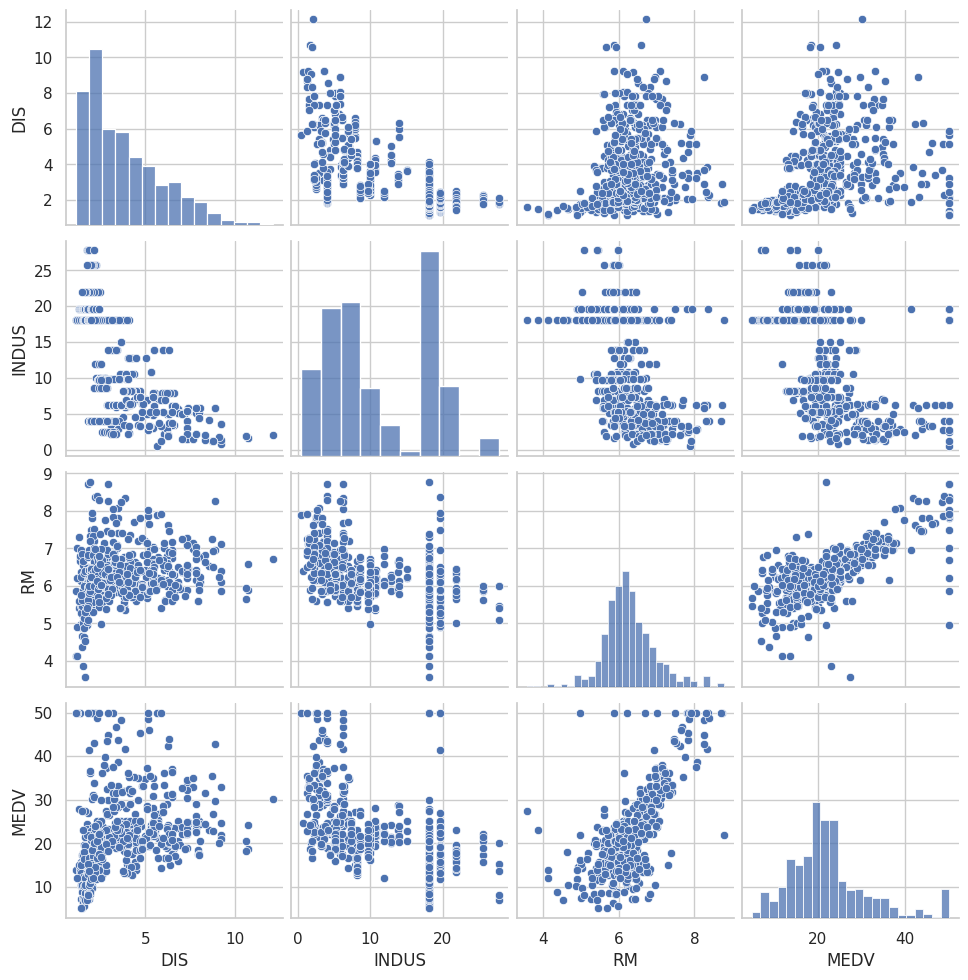

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', context='notebook')

cols = ['DIS', 'INDUS', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5)
plt.show()

Una vez que se ve cómo están correlacionadas las variables de manera visual es importante usar un método numérico para poder entender las correlaciones.

<Axes: >

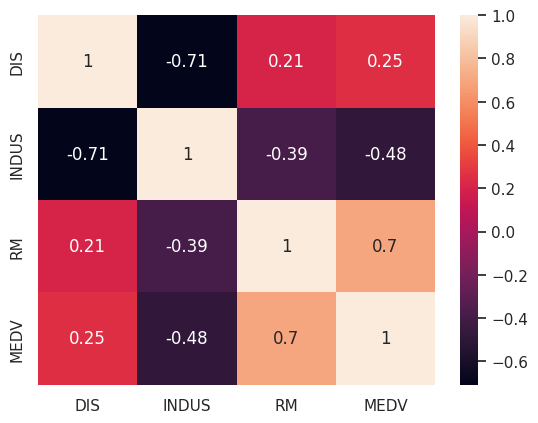

In [8]:
# calcularemos los coeficientes de correlación...
# entre todas las 5 variables escogidas, DIS, INDUS, CRIM, RM, MEDV

import numpy as np

cm = np.corrcoef(df[cols].values.T) # obtenemos los coef de correl entre las 5 variables, de una vez con los valores transpuesto
sns.set(font_scale=1) #le decimos a seaborn como graficar la fuente, el texto
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)


## Creando modelo con scikit-learn

In [13]:
from sklearn.preprocessing import StandardScaler # para escalar datos, que permite ajuste mejor del modelo a ellos
from sklearn.linear_model import LinearRegression

# Definimos cual va a ser las variables x , y

x = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values.reshape(-1, 1)

# Estandarizamos los valores para poder ajustar el modelo y mejorarlo

sc_x = StandardScaler()
sc_y = StandardScaler()

x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y)

# creamos modelo de regresión lineal slr = standard linear regresion

slr = LinearRegression()
slr.fit(x_std, y_std)


LinearRegression()

## Análisis de resultados

Text(0.5, 0, 'Promedio de habitaciones [RM]')

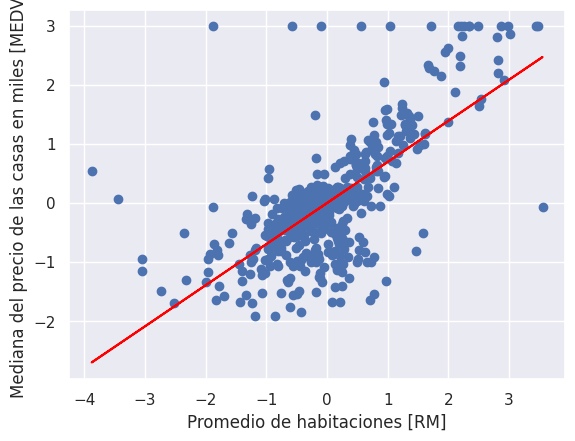

In [20]:
# Graficamos las dos variables
plt.scatter(x_std, y_std)

# Graficamos las predicciones de todos estos valores

plt.plot(x_std, slr.predict(x_std), color='red')
plt.ylabel("Mediana del precio de las casas en miles [MEDV]")
plt.xlabel("Promedio de habitaciones [RM]")

## Generando predicción con el modelo

In [27]:
# Con el modelo generado, empezamos a predecir valores

num_habitaciones = 5
num_habitaciones_std = sc_x.transform(np.array([num_habitaciones]).reshape(-1,1)) # standarizamos num_habitaciones,
print(slr.predict(num_habitaciones_std)) # predecir valor

# aplicamos transformada inversa a predicción

print("El precio de una casa con 5 habitaciones en Boston es de", sc_y.inverse_transform(slr.predict(num_habitaciones_std)))


[[-1.2726238]]
El precio de una casa con 5 habitaciones en Boston es de [[10.83992413]]
